## Real or Not? NLP with Disaster Tweets
- 트위터의 트윗을 보고 진짜 재난이 일어난것인지 아닌지 판단

### 데이터 구성
- Train, Test, submission

### 데이터 컬럼
- id : 각각의 트윗의 유니크한 id값
- text : 트윗 텍스트 내용
- location : 트윗 게시된 장소
- keyword : 트윗의 특정 키워드
- target : train 데이터에만 있고 트윗이 진짜 재난(1) 인지 재난이 아닌지(0) 라벨 붙여놓은 것

train : 7613개 데이터
test : 3263개 데이터

In [1]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import missingno as msno
import seaborn as sns

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', train_df.shape[0])
pd.set_option('display.max_rows', None)

In [2]:
train_df = pd.read_csv("nlp-getting-started/train.csv")
test_df = pd.read_csv("nlp-getting-started/test.csv")

In [3]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
train_df[train_df['target'] == 1]['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

#### 처음부터 5개의 트윗을 가져와서 카운트 벡터라이즈 해줌

In [7]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

#### 1. 그 5개 트윗에는 54개의 유니크한 단어가 있음. (첫번째 트윗에는 그 54개의 단어 중에 13개 정도만 포함하고 있음)

In [8]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)

print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


#### 이번에는 모든 트윗을 가져와서 카운트 벡터라이즈 해줌
- train 데이터만 fit_transform 해주고 test 데이터는 transform만 해줌
- train 데이터로만 fit 해줘야함
- 다른 옵션 : TFIDF, LSA, LSTM, RNN, 등 여러가지 적용

In [9]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

#### 모델 생성

In [60]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59453669, 0.56455572, 0.64113893])

#### 모델 핏시키기

In [61]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

#### submission 파일 불러오기

In [62]:
sample_submission = pd.read_csv("nlp-getting-started/sample_submission.csv")

#### 검증데이터로 예측한 값을 submission 데이터 프레임에 추가

In [63]:
sample_submission["target"] = clf.predict(test_vectors)

In [64]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


#### submission 파일 만들고 이 파일 제출

In [65]:
sample_submission.to_csv("submission.csv", index=False)

## 1. 데이터 전처리

#### 결측데이터 확인

In [56]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [34]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

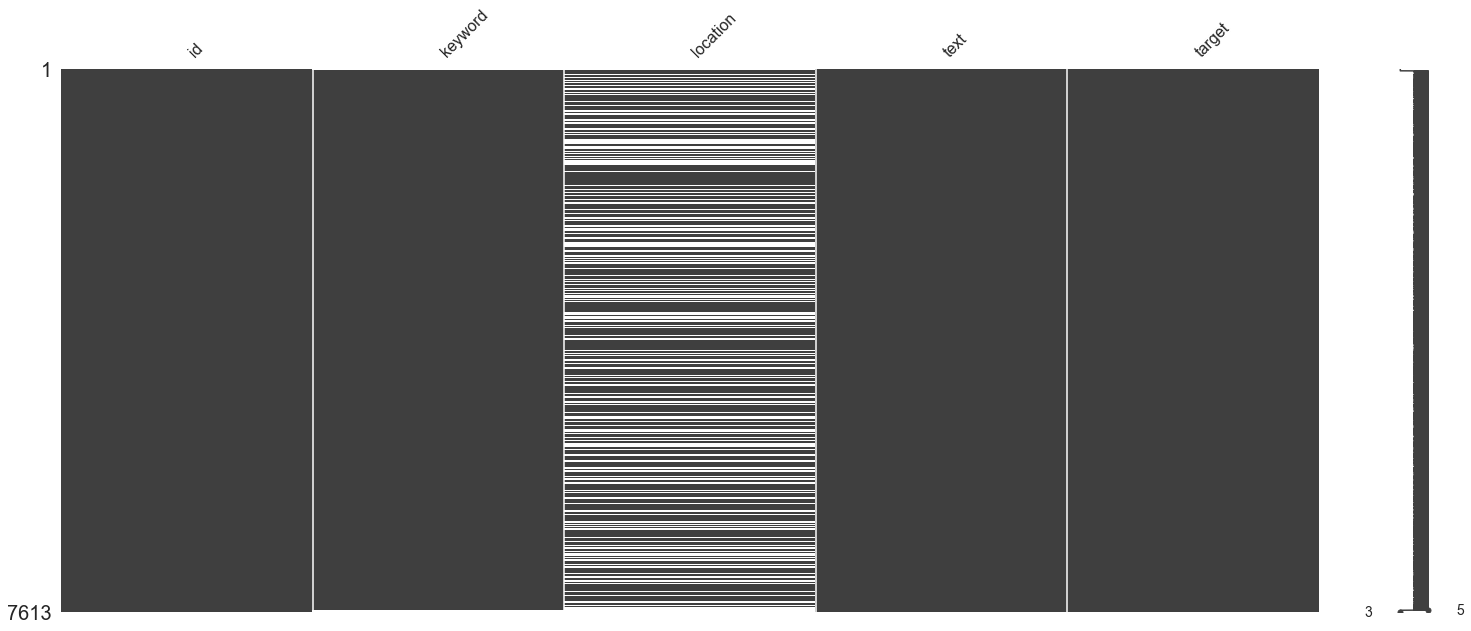

In [29]:
msno.matrix(train_df)
plt.show()

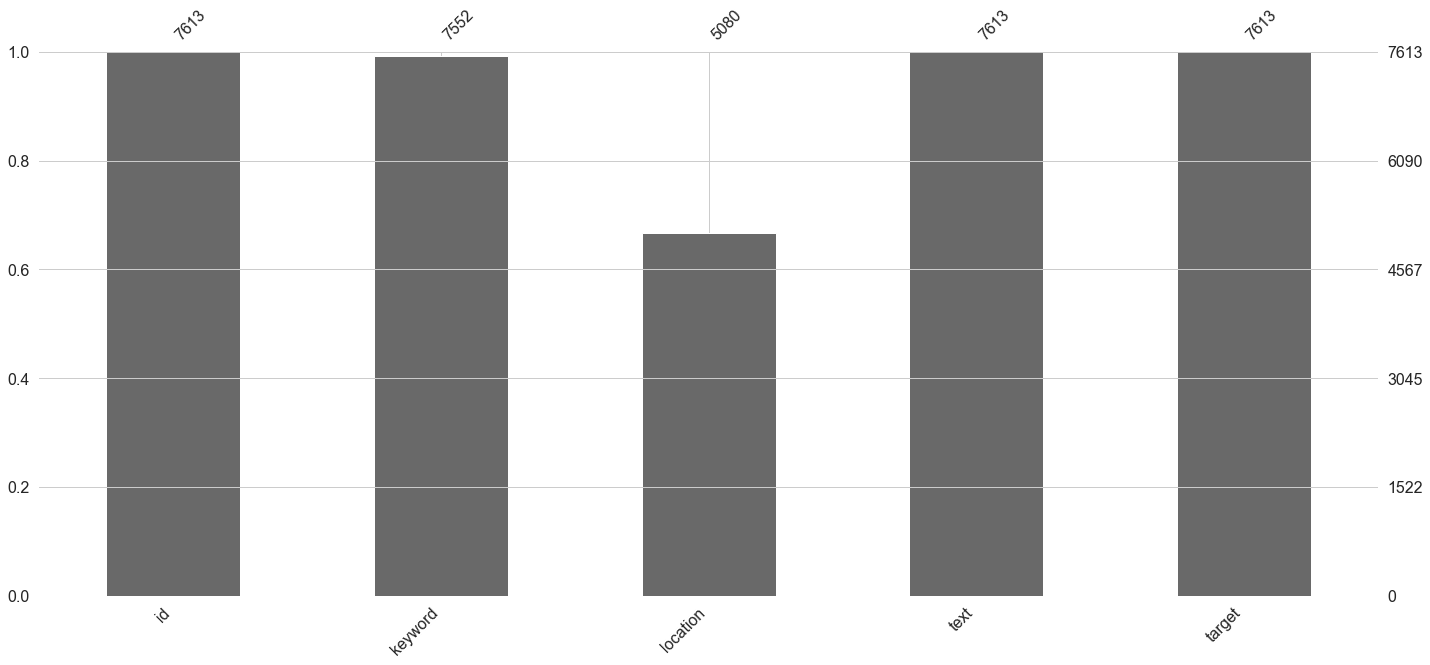

In [31]:
msno.bar(train_df)
plt.show()

In [47]:
train_df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [48]:
test_df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

### 빈 데이터 확인

In [10]:
missing = ['keyword', 'location']

In [11]:
train_df[missing].isnull().sum().index

Index(['keyword', 'location'], dtype='object')

#### Train에 있는 Keyword의 유니크값의 갯수와 Test에 있는 Keyword의 유니크값의 갯수가 같다.
- 이걸 봤을때 우리는 train과 test는 같은 샘플 텍스트에서 가져왔다는 것을 유추해볼 수 있다.

In [15]:
train_df['keyword'].nunique(), test_df['keyword'].nunique()

(221, 221)

#### train, test 데이터 확인

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


#### 재난 트윗이 아닌 것이 4342개, 재난 트윗이 3271개

In [15]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Text 파일에 웹사이트 주소, 해쉬태그, @, 대문자 등 전처리가 필요한 문자들이 많다.

In [47]:
train_df['text']

0       Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                                        
1       Forest fire near La Ronge Sask. Canada                                                                                                                       
2       All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected                        
3       13,000 people receive #wildfires evacuation orders in California                                                                                             
4       Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school                                                                      
5       #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires                                               
6   

In [49]:
' '.join(train_df['text'])

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

1. 이메일은 이메일로 바꿔주고
2. 바꿀거 바꿨으면 #, @등 필요없는 문자들 제거해주기
3. 문자들 다 소문자로 바꾸어주기
4. 띄어쓰기 수정해주기

### 1. Regular expression 사용하여 특수문자 제거

In [51]:
import re
re.sub('[^a-zA-Z]', ' ', ' '.join(train_df['text']))

'Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask  Canada All residents asked to  shelter in place  are being notified by officers  No other evacuation or shelter in place orders are expected        people receive  wildfires evacuation orders in California  Just got sent this photo from Ruby  Alaska as smoke from  wildfires pours into a school   RockyFire Update    California Hwy     closed in both directions due to Lake County fire    CAfire  wildfires  flood  disaster Heavy rain causes flash flooding of streets in Manitou  Colorado Springs areas I m on top of the hill and I can see a fire in the woods    There s an emergency evacuation happening now in the building across the street I m afraid that the tornado is coming to our area    Three people died from the heat wave so far Haha South Tampa is getting flooded hah  WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK  flooding  raining  flooding  Florida